In [4]:
library(tidyverse)

source("/home/joosungm/projects/def-lelliott/joosungm/projects/peak-bloom-prediction/code/F01_functions.r")
kyoto_df <- data.frame(data.table::fread("../outputs/A_outputs/A31_japan_temperature.csv")) %>% select(-row_num, -id_rownum)
head(kyoto_df)
dim(kyoto_df)

station_ids <- unique(kyoto_df$id)
length(station_ids)

,id,date,tmax,tmin,prcp,year,month,day
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,JA000047616,1951-01-01,3.7,0.3,34.8,1951,1,1
2,JA000047616,1951-01-02,3.5,-1.3,3.5,1951,1,2
3,JA000047616,1951-01-03,4.7,-1.3,7.2,1951,1,3
4,JA000047616,1951-01-04,5.8,0.3,3.7,1951,1,4
5,JA000047616,1951-01-05,5.0,-0.3,5.8,1951,1,5
6,JA000047616,1951-01-06,5.4,-0.4,0.0,1951,1,6


[1] 253389      8

[1] 10

In [5]:
kyoto_complete <- F01_compute_gdd(weather_df = kyoto_df, noaa_station_ids = station_ids)
head(kyoto_complete)
tail(kyoto_complete)
dim(kyoto_complete)

data.table::fwrite(kyoto_complete, "../outputs/A_outputs/temp/A41_kyoto_complete.csv")

,id,date,tmax,tmin,prcp,year,month,day,daily_Cd,daily_Ca,Cd_cumsum,prcp_cumsum,Ca_cumsum,diff_Ca_Cd,diff_Ca_Cd_cumsum
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,JA000047616,1951-10-01,24.4,16.4,0.0,1951,10,1,0,13.40,0,0.0,0,13.40,13.40
2,JA000047616,1951-10-02,25.6,13.6,0.3,1951,10,2,0,12.60,0,0.3,0,12.60,26.00
3,JA000047616,1951-10-03,23.4,11.7,0.0,1951,10,3,0,10.55,0,0.3,0,10.55,36.55
4,JA000047616,1951-10-04,24.0,9.4,0.0,1951,10,4,0,9.70,0,0.3,0,9.70,46.25
5,JA000047616,1951-10-05,23.8,10.7,3.0,1951,10,5,0,10.25,0,3.3,0,10.25,56.50
6,JA000047616,1951-10-06,21.4,9.2,0.0,1951,10,6,0,8.30,0,3.3,0,8.30,64.80


,id,date,tmax,tmin,prcp,year,month,day,daily_Cd,daily_Ca,Cd_cumsum,prcp_cumsum,Ca_cumsum,diff_Ca_Cd,diff_Ca_Cd_cumsum
,<chr>,<date>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
139665,JA000047891,2019-04-25,25.6,17.0,0.5,2019,4,25,0.0,14.30,-257.7195,456.0,431.30,14.30,869.6805
139666,JA000047891,2019-04-26,24.2,14.5,0.0,2019,4,26,0.0,12.35,-257.7195,456.0,443.65,12.35,882.0305
139667,JA000047891,2019-04-27,17.2,7.6,6.1,2019,4,27,0.0,5.40,-257.7195,462.1,449.05,5.40,887.4305
139668,JA000047891,2019-04-28,16.5,7.0,0.0,2019,4,28,0.0,4.75,-257.7195,462.1,453.80,4.75,892.1805
139669,JA000047891,2019-04-29,19.6,3.6,0.0,2019,4,29,-1.7,6.30,-259.4195,462.1,460.10,4.60,896.7805
139670,JA000047891,2019-04-30,17.7,12.6,20.6,2019,4,30,0.0,8.15,-259.4195,482.7,468.25,8.15,904.9305


[1] 139670     15

In [6]:
library(tidyverse)
kyoto_complete <- data.frame(data.table::fread("../outputs/A_outputs/temp/A41_kyoto_complete.csv")) %>%
    mutate(date = as.character(date))

city_table <- read.csv("../outputs/A_outputs/A31_japan_station_city.csv") %>%
    dplyr::select(id, name)

cherry_bloom_date <- read.csv("../outputs/A_outputs/A11_cherry_sub.csv") %>%
    mutate(city_upper = toupper(city)) %>%
    filter(city_upper %in% city_table$name) %>%
    dplyr::select(-location, -city)

city_loc <- cherry_bloom_date %>%
    distinct(city_upper, .keep_all = TRUE)

kyoto_complete2 <- kyoto_complete %>% 
    merge(y = city_table, by = "id", all.x = TRUE) %>%
    merge(y = city_loc[, c("lat", "long", "alt", "city_upper")], by.x = "name", by.y = "city_upper", all.x = TRUE) %>%
    merge(y = cherry_bloom_date[, c("bloom_date", "bloom_doy", "city_upper")], by.x = c("name", "date"), , by.y = c("city_upper", "bloom_date"), all.x = TRUE, all.y = TRUE) %>%
    mutate(is_bloom = ifelse(!is.na(bloom_doy), 1, 0)) %>%
    filter(month > 2)

dim(kyoto_complete2)
head(kyoto_complete2)
write.csv(kyoto_complete2, "../outputs/A_outputs/A41_gdd_kyoto.csv", row.names = FALSE)

[1] 100800     21

,name,date,id,tmax,tmin,prcp,year,month,day,daily_Cd,⋯,Cd_cumsum,prcp_cumsum,Ca_cumsum,diff_Ca_Cd,diff_Ca_Cd_cumsum,lat,long,alt,bloom_doy,is_bloom
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,FUKUI,1951-10-01,JA000047616,24.4,16.4,0.0,1951,10,1,0,⋯,0,0.0,0,13.40,13.40,36.05556,136.2225,8.8,NA,0
2,FUKUI,1951-10-02,JA000047616,25.6,13.6,0.3,1951,10,2,0,⋯,0,0.3,0,12.60,26.00,36.05556,136.2225,8.8,NA,0
3,FUKUI,1951-10-03,JA000047616,23.4,11.7,0.0,1951,10,3,0,⋯,0,0.3,0,10.55,36.55,36.05556,136.2225,8.8,NA,0
4,FUKUI,1951-10-04,JA000047616,24.0,9.4,0.0,1951,10,4,0,⋯,0,0.3,0,9.70,46.25,36.05556,136.2225,8.8,NA,0
5,FUKUI,1951-10-05,JA000047616,23.8,10.7,3.0,1951,10,5,0,⋯,0,3.3,0,10.25,56.50,36.05556,136.2225,8.8,NA,0
6,FUKUI,1951-10-06,JA000047616,21.4,9.2,0.0,1951,10,6,0,⋯,0,3.3,0,8.30,64.80,36.05556,136.2225,8.8,NA,0


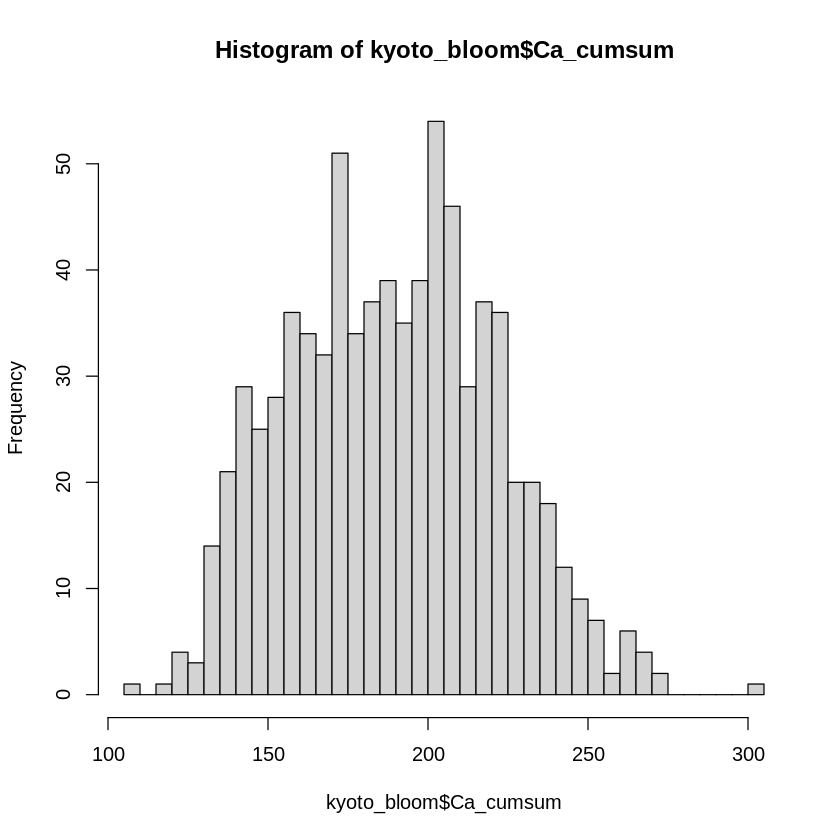

In [21]:
kyoto_bloom_idx <- (kyoto_complete2$is_bloom == 1) 
kyoto_bloom <- kyoto_complete2[kyoto_bloom_idx, ] %>%
    mutate(tmean = (tmax + tmin)/2) 
kyoto_bloom$idx <- seq_len(nrow(kyoto_bloom))
# dim(kyoto_bloom)
# head(kyoto_bloom)

hist(kyoto_bloom$Ca_cumsum, breaks = 30)

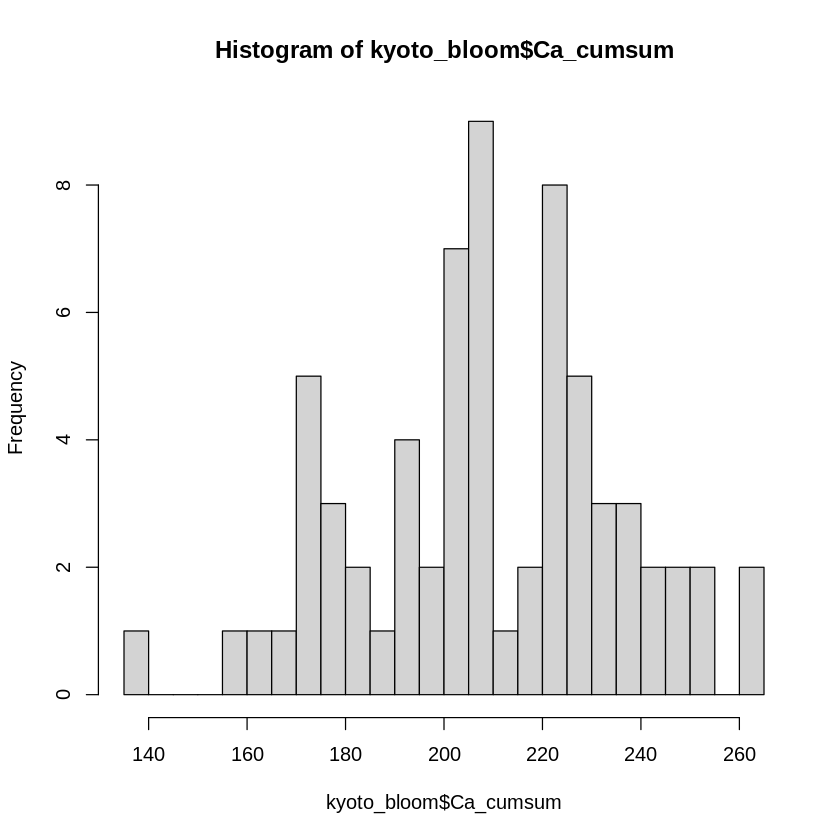

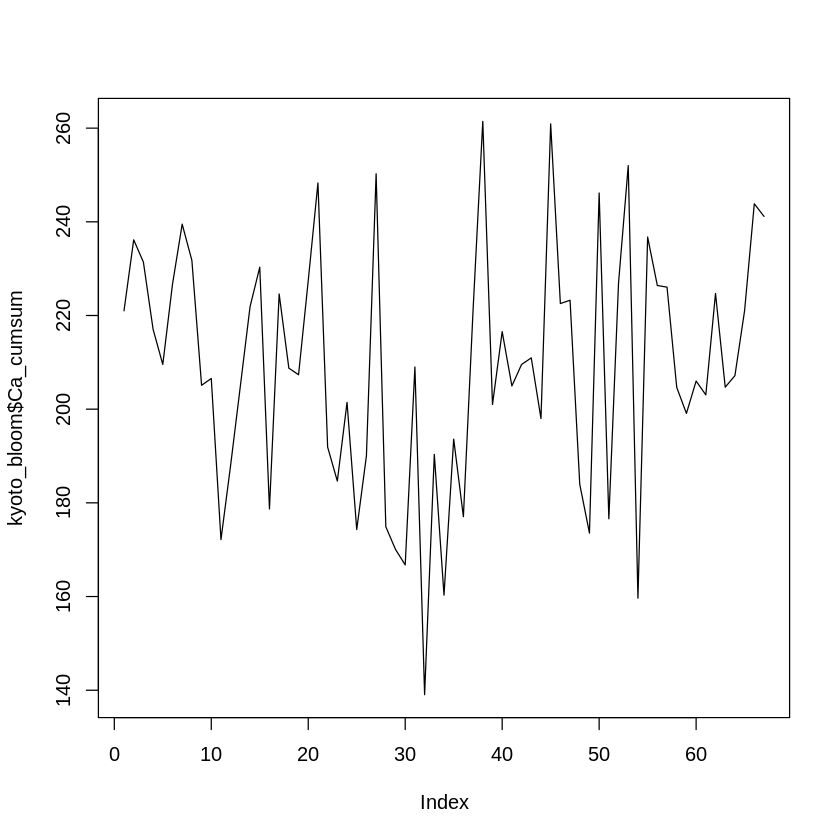

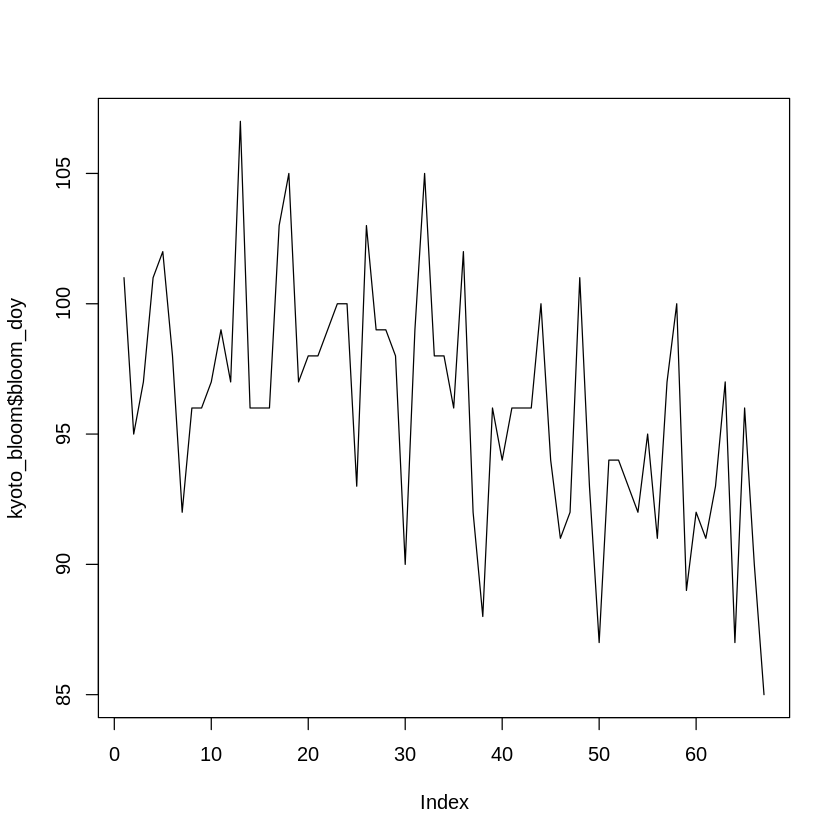

In [22]:
# kyoto_bloom_idx <- (kyoto_complete2$is_bloom == 1) & (kyoto_complete2$year > 1980)
# kk <- kyoto_complete2$is_bloom == 

kyoto_bloom_idx <- (kyoto_complete2$is_bloom == 1) 
kyoto_bloom <- kyoto_complete2[kyoto_bloom_idx, ] %>%
    mutate(tmean = (tmax + tmin)/2) %>%
    filter(name == "KYOTO")
kyoto_bloom$idx <- seq_len(nrow(kyoto_bloom))
# dim(kyoto_bloom)
# head(kyoto_bloom)

hist(kyoto_bloom$Ca_cumsum, breaks = 30)
plot(kyoto_bloom$Ca_cumsum, type = "l")
plot(kyoto_bloom$bloom_doy, type = "l")

In [3]:
# kyoto_complete2[((140 > kyoto_complete2$Ca_cumsum) | (kyoto_complete2$Ca_cumsum > 250)) & (kyoto_complete2$is_bloom), ]
# kyoto_out <- kyoto_complete2 %>% 
#     filter(130 < Ca_cumsum & Ca_cumsum < 250)
# write.csv(kyoto_out, "../outputs/A_outputs/A41_gdd_kyoto.csv", row.names = FALSE)

In [7]:
# perform segmented regression to find the break point.
# library(segmented)
# kyoto_glm <- glm(formula = Ca_cumsum ~ idx, data = kyoto_bloom, family = gaussian)
# # summary(kyoto_glm)
# kyoto_seg <- segmented::segmented(kyoto_glm, seg.Z = ~idx)

# slope(kyoto_seg)
# psi <- round(kyoto_seg$psi[, "Est."])

# kyoto_fitted <- fitted(kyoto_seg)
# kyoto_model <- data.frame(idx = kyoto_bloom$idx, Ca_cumsum = kyoto_fitted)

# p <- ggplot(data = kyoto_bloom, aes(x = idx, y = Ca_cumsum))
# p <- p + geom_point(color = "steelblue")
# p <- p + geom_line(data = kyoto_model, aes(x = idx, y = Ca_cumsum), colour = "tomato")
# p <- p + annotate("text", x = 30, y = max(kyoto_bloom$Ca_cumsum), label = paste0("psi = ", psi))
# p